#Tutorial on Data Augmentation using tf.image



When training a Machine Learning model, especially Deep Learning models, We require a lot of data. If there is a scarcity of data, then the model is prone to underfitting. Unfortunately, scarcity of data is very common. So, we have to make use of the handful amount of data we have. Also, creating a variation in data helps in preventing overfitting as well.

In this scenario, using data augmentation, We could increase the number of examples of a dataset. We take the provided data and augment it i.e. crop the image, rotate it, change colors, flip, etc. Doing this increases the number of samples and increase variation and helps us to create a good model.

Now, Let's Learn data augmentation using tf.image

In [0]:
%tensorflow_version 2.x

Import all the required libraries

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers

We will be checking the data augmentation feautres on an image and we will be augmenting a whole dataset later to train a model.

Using colab's upload functionality to upload an image for augmentation.

In [0]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving a.png to a.png


In [0]:
image_path = 'a.png'
 
image_string=tf.io.read_file(image_path)
 
image=tf.image.decode_jpeg(image_string,channels=3)

A function to visualize and compare the original and augmented image side by side.

In [0]:
def visualize(original, augmented):
  fig = plt.figure()
  original_plt=fig.add_subplot(1,2,1)
  original_plt.set_title('original image')
  original_plt.imshow(original)

  augmented_plt=fig.add_subplot(1,2,2) 
  augmented_plt.set_title('augmented image')
  augmented_plt.imshow(augmented)
  plt.show(block=True)

### 1.Flipping the image
You could flip the image either vertically or horizontally.

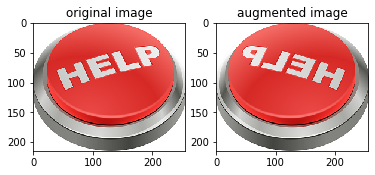

In [0]:
flipped = tf.image.flip_left_right(image)
visualize(image,flipped)

### Grayscale the image
You could grayscale an image.

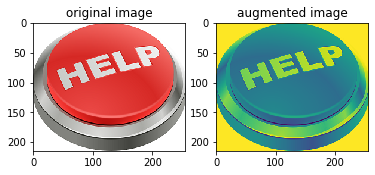

In [0]:
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image, tf.squeeze(grayscaled))

### Saturate the image
you could saturate an image by providing a saturation factor.

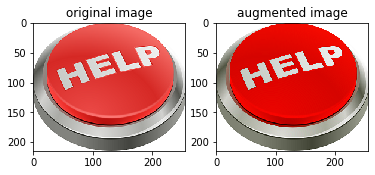

In [0]:
saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

### Change image brightness
You could change the brightness of image by providing a brightness factor.

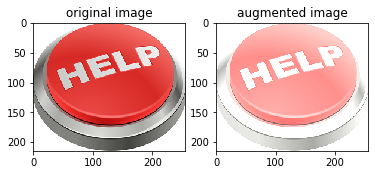

In [0]:
bright = tf.image.adjust_brightness(image, 0.4)
visualize(image, bright)

### Rotate the image
You could rotate an image to your desired angles.

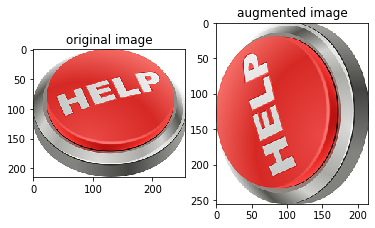

In [0]:
rotated = tf.image.rot90(image)
visualize(image,rotated)

### Center crop the image
You could crop the image from center upto the image part you desire.

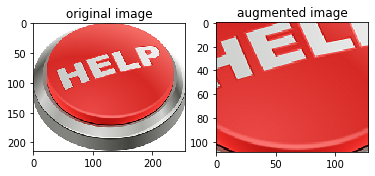

In [0]:
cropped = tf.image.central_crop(image, central_fraction=0.5)
visualize(image,cropped)

There are lots of other augmentation options available. You could check them by seeing the available attributes of tf.image. For now, We will be moving to next step.

## Augmenting a Dataset and training a model on it

We will be training our model on mnist dataset.

In [0]:
import tensorflow_datasets as tfds

In [0]:
dataset, info =  tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

num_train_examples= info.splits['train'].num_examples

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/1.0.0. Subsequent calls will reuse this data.


In this scale function, we will be augmenting our image. The dataset will be passed to this function and it will augment the data and return the dataset.

In [0]:
def scale(image,label):
  image = tf.image.resize(image, (28, 28))/255.0 #normalizing the image
  image = tf.image.random_crop(image, size=[28,28,1]) #providing random crop to image
  image = tf.image.random_brightness(image, max_delta=0.5) #providing random brightness to image
  image = tf.image.random_flip_left_right(image) #providing random flip to image

  return image,label

BATCH_SIZE = 64

train_batches1      = train_dataset.shuffle(num_train_examples//4).map(scale).batch(BATCH_SIZE).prefetch(1) #A batch dataset that can be directly passed to model for training


Creating and compiling the model. The model will be a 2 layered Fully connected neural network without convolution.

In [0]:
model = tf.keras.Sequential([
            layers.Flatten(input_shape=(28, 28,1)),
            layers.Dense(256, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer = 'adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])


Training the model

In [0]:
model.fit(train_batches1, epochs=5)

Epoch 1/5
938/938 [==============================] - 24s 26ms/step - loss: 0.2269 - accuracy: 0.9294
Epoch 2/5
938/938 [==============================] - 22s 23ms/step - loss: 0.1786 - accuracy: 0.9434
Epoch 3/5
938/938 [==============================] - 22s 23ms/step - loss: 0.1495 - accuracy: 0.9531
Epoch 4/5
938/938 [==============================] - 22s 23ms/step - loss: 0.1326 - accuracy: 0.9579
Epoch 5/5
938/938 [==============================] - 22s 23ms/step - loss: 0.1166 - accuracy: 0.9631


# Conclusion:
As we can see, the model provided 96.31% accuracy on training set. This is slightly higher than the model trained without data augmentation. So, Data Augmentation is good. It didn't provide much significance on this model because the dataset already had a large number of samples. But, on a small dataset, you could see a huge difference.